<a href="https://colab.research.google.com/github/Rin-niee/MachineLearning/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# МЛ практика 5. Задача регрессии

## **Цель занятия:**
Изучить задачу регрессии, познакомиться с метриками качества, реализовать модель для решения задачи с использованием разных моделей.

## **Задание состоит из следующих частей:**
1. Понимание значимости отбора признаков
2. Обучение регрессии
3. Метирки качества для регресии (только самые важные)
4. Регулязризация

## Задачи для домашки ⏰

1. Выбрать y = непрерывная переменая
2. Разделить на обучающую, тестовую и валидационную выборки
3. Выбрать лучшие признаки для X и выбрать лучший результат
4. Объяснить результаты метрик качества MAE, MSE, R2

**Для 👽**
5. Попробовать модель ```KNeighborsRegressor```, объяснить как работает модель, объяснить результат
6. Попробовать модель ```DecisionTreeRegressor```, объяснить как работает модель, объяснить результат

In [1]:
! pip install pandas scikit-learn seaborn scipy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Загрузка набора данных
try:
    df = pd.read_csv('/content/heart.csv')
except FileNotFoundError:
    df = pd.read_csv('heart.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   AGE_50     200 non-null    int64
 1   MD_50      200 non-null    int64
 2   SBP_50     200 non-null    int64
 3   DBP_50     200 non-null    int64
 4   HT_50      200 non-null    int64
 5   WT_50      200 non-null    int64
 6   CHOL_50    200 non-null    int64
 7   SES        200 non-null    int64
 8   CL_STATUS  200 non-null    int64
 9   MD_62      200 non-null    int64
 10  SBP_62     200 non-null    int64
 11  DBP_62     200 non-null    int64
 12  CHOL_62    200 non-null    int64
 13  WT_62      200 non-null    int64
 14  IHD_DX     200 non-null    int64
 15  DEATH      200 non-null    int64
dtypes: int64(16)
memory usage: 25.1 KB


In [5]:
y = df['AGE_50'] # выбираем целевую переменную (количественная) - в качестве перемменной был выбран возраст
X = df.drop('AGE_50', axis=1) # обнуляем переменную, берем остальные

In [6]:
X

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


Преобразование категориальных переменных остается без изменений

In [7]:
# Создаем копию данных
df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH']] = df[['MD_50', 'SES', 'CL_STATUS', 'MD_62', 'IHD_DX', 'DEATH']].astype({'MD_50':'category', 'SES':'category', 'CL_STATUS':'category', 'MD_62':'category', 'IHD_DX':'category', 'DEATH':'category'})
category_columns: list[str] = X.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding к категориальным столбцам, исключая первую категорию (drop_first=True)
X = pd.get_dummies(X, columns=category_columns,drop_first=True)


In [8]:
X

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [9]:
df_corr_test = X.copy()

# Добавляем целевую переменную в копию данных
df_corr_test['y'] = y
df_corr_test

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH,y
0,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1,42
1,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1,53
2,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1,53
3,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1,48
4,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0,50
196,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0,23
197,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0,20
198,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0,46


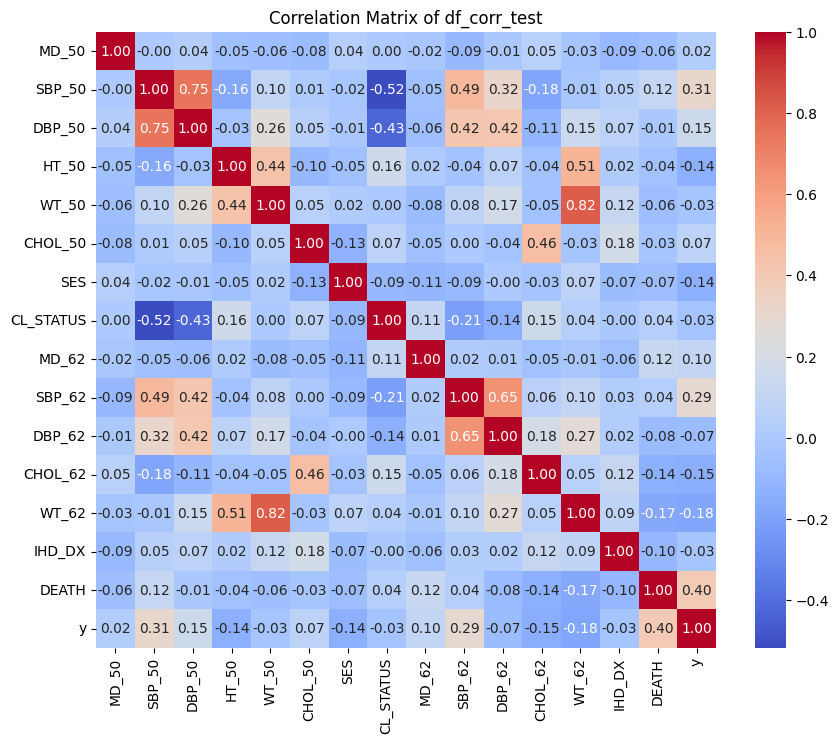

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Предположим, что у вас уже есть DataFrame под названием df_corr_test
# Выводим матрицу корреляции (только для числовых столбцов)
correlation_matrix = df_corr_test.select_dtypes(['int', 'float']).corr()

# Отображаем матрицу корреляции с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of df_corr_test")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def resolve_regression(X, y, regularization=None):
    """
    Выполняет регрессию с учетом регуляризации.

    Parameters:
    - X: Входные данные (признаки).
    - y: Целевые значения.
    - regularization: Тип регуляризации ('l1', 'l2', None). Если None, используется обычная линейная регрессия.
    """
    # Разделение данных на обучающую и тестовую выборки (80% / 20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Инициализация модели в зависимости от типа регуляризации
    if regularization == 'l1':
        model = Lasso() # L1-регуляризация (Lasso)
    elif regularization == 'l2':
        model = Ridge() # L2-регуляризация (Ridge)
    else:
        model = LinearRegression() # Линейная регрессия без регуляризации

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик качества
    mae = mean_absolute_error(y_test, y_pred) # Средняя абсолютная ошибка
    mse = mean_squared_error(y_test, y_pred)  # Средняя квадратичная ошибка
    r2 = r2_score(y_test, y_pred)             # Коэффициент детерминации (R^2)

    # Вывод результатов
    print(f"Regularization: {regularization}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

    return model, X_train, X_test, y_train, y_test

In [12]:
resolve_regression(X, y)
None # Используем None (оператор ничего не делает) чтобы убрать вывод от return у функции resolve_regression. Пока он нам не нужен и и будет мешать


Regularization: None
Mean Absolute Error (MAE): 8.58
Mean Squared Error (MSE): 101.78
R^2 Score: -0.06


Попробуем намутить что-нибудь с признаками

In [26]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_supercoolfilter = SelectKBest(score_func=chi2, k=5)
X_kbest = selector.fit_transform(X, y)

In [27]:
selector.get_support(indices=True)

array([ 1,  2,  9, 12, 14])

In [29]:
selected_features = X.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['SBP_50', 'DBP_50', 'SBP_62', 'WT_62', 'DEATH'], dtype='object')


In [31]:
resolve_regression(X[['SBP_50', 'SBP_62', 'DEATH']], y)
None


Regularization: None
Mean Absolute Error (MAE): 8.75
Mean Squared Error (MSE): 113.24
R^2 Score: -0.18


In [32]:
resolve_regression(X[['SBP_50', 'DBP_50', 'SBP_62', 'WT_62', 'DEATH']], y)
None


Regularization: None
Mean Absolute Error (MAE): 9.13
Mean Squared Error (MSE): 116.64
R^2 Score: -0.22


Мда. Как будто бы стало даже хуже

Теперь попробуем оптимизировать числовые переменные и сделать тоже самое

In [33]:
X

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   MD_50      200 non-null    int64
 1   SBP_50     200 non-null    int64
 2   DBP_50     200 non-null    int64
 3   HT_50      200 non-null    int64
 4   WT_50      200 non-null    int64
 5   CHOL_50    200 non-null    int64
 6   SES        200 non-null    int64
 7   CL_STATUS  200 non-null    int64
 8   MD_62      200 non-null    int64
 9   SBP_62     200 non-null    int64
 10  DBP_62     200 non-null    int64
 11  CHOL_62    200 non-null    int64
 12  WT_62      200 non-null    int64
 13  IHD_DX     200 non-null    int64
 14  DEATH      200 non-null    int64
dtypes: int64(15)
memory usage: 23.6 KB


Отбор признаков по корреляции

In [35]:
import pandas as pd
import numpy as np

def select_features_correlation(X, y, max_features=5):
    # Вычисляем корреляцию признаков с целевой переменной
    correlation = X.apply(lambda col: np.abs(col.corr(y)))

    # Отбираем top-N признаков с наибольшей корреляцией
    top_features = correlation.nlargest(max_features).index

    # Возвращаем X и y с отобранными признаками
    return X[top_features], y


Отбор признаков с помощью RFE (Recursive Feature Elimination)

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

def select_features_rfe(X, y, max_features=5):
    # Инициализация модели линейной регрессии
    model = LinearRegression()

    # RFE с указанным количеством признаков
    selector = RFE(model, n_features_to_select=max_features)
    selector = selector.fit(X, y)

    # Отбор признаков
    selected_features = X.columns[selector.support_]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y


In [37]:
# Предположим, что у вас есть данные X и y
# Используем отбор на основе корреляции
X_selected_corr, y_selected_corr = select_features_correlation(X, y, max_features=5)

# Используем отбор с помощью RFE
X_selected_rfe, y_selected_rfe = select_features_rfe(X, y, max_features=5)


In [38]:
resolve_regression(X_selected_corr, y_selected_corr)
None

Regularization: None
Mean Absolute Error (MAE): 9.13
Mean Squared Error (MSE): 116.64
R^2 Score: -0.22


In [39]:
resolve_regression(X_selected_rfe, y_selected_rfe)
None

Regularization: None
Mean Absolute Error (MAE): 9.04
Mean Squared Error (MSE): 114.77
R^2 Score: -0.20


Одни значения огромные, другие вообще стремятся в отрицательное число, как-то сомнительно(?)

Regularization: None
Mean Absolute Error (MAE): 9.04
Mean Squared Error (MSE): 114.77
R^2 Score: -0.20


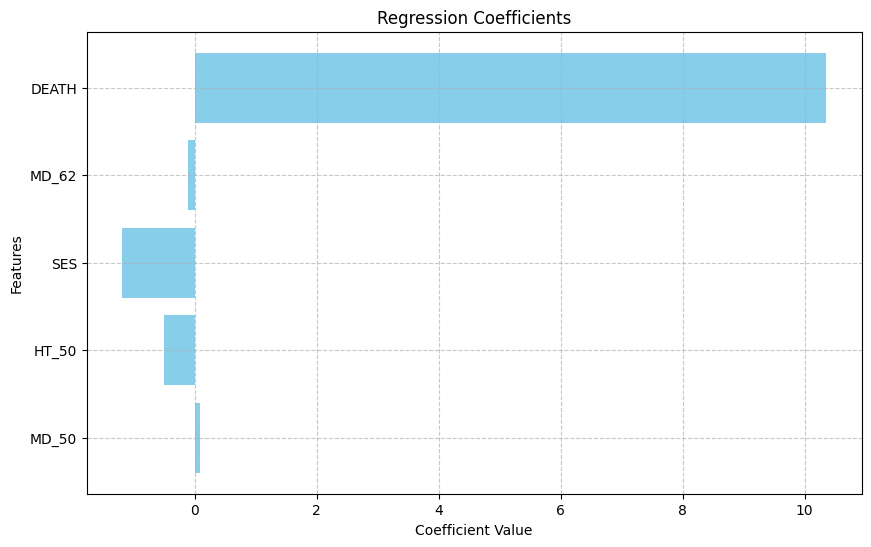

In [40]:
import matplotlib.pyplot as plt

def plot_regression_coefficients(model, feature_names):
    # Извлекаем коэффициенты регрессии
    coefficients = model.coef_

    # Создаем столбчатую диаграмму для визуализации коэффициентов
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, coefficients, color='skyblue')
    plt.xlabel("Coefficient Value")
    plt.ylabel("Features")
    plt.title("Regression Coefficients")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Пример использования:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe, None)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


На графике отображены коэффициенты линейной регрессии для различных признаков. Коэффициенты показывают вклад каждого признака в модель. Например, положительный коэффициент для `type_white` указывает, что этот тип вина повышает прогнозируемое значение. Наибольшее влияние на модель оказывают признаки `type_white`, `density` и `volatile acidity`.

Метрики модели:
- **MAE** (Средняя абсолютная ошибка): 0.35 — средняя разница между предсказанными и фактическими значениями.
- **MSE** (Среднеквадратичная ошибка): 0.20 — средняя квадратичная ошибка, чувствительна к большим ошибкам.
- **R²** (Коэффициент детерминации): 0.86 — модель объясняет 86% дисперсии данных, что указывает на высокую точность.

**Дисперсия** — это мера разброса значений целевой переменной. Она показывает, насколько данные отклоняются от среднего.

**Коэффициент детерминации**
𝑅2 = 0.86 означает, что модель объясняет 86% вариации данных. Это значит, что 86% разброса в значениях целевой переменной модель смогла предсказать, а 14% остаются необъясненными (шум или неизвестные факторы).

In [41]:
# Выбираем числовые признаки
numeric_features = X_selected_rfe.select_dtypes(include=['int64']).columns.tolist()
# ВНИМАНИЕ: тут отбираются только float, если у вас не категориальные признаки имеют тип int - нужно исправить (например, в ручную указать нужные столбцы)

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


<ipython-input-41-e8fd9b11681e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected_rfe[numeric_features] = scaler.fit_transform(X_selected_rfe[numeric_features])


In [42]:
X_selected_rfe

,MD_50,HT_50,SES,MD_62,DEATH
0,0.000000,0.214286,0.25,0.75,1.0
1,0.000000,0.571429,0.00,0.25,1.0
2,0.333333,0.642857,0.75,0.00,1.0
3,1.000000,0.785714,0.75,0.25,1.0
4,0.666667,0.357143,0.50,1.00,1.0
...,...,...,...,...,...
195,0.000000,0.357143,0.25,0.00,0.0
196,0.000000,0.571429,0.50,0.25,0.0
197,0.666667,0.357143,1.00,0.00,0.0
198,0.666667,0.357143,0.75,0.25,0.0


Regularization: None
Mean Absolute Error (MAE): 9.04
Mean Squared Error (MSE): 114.77
R^2 Score: -0.20


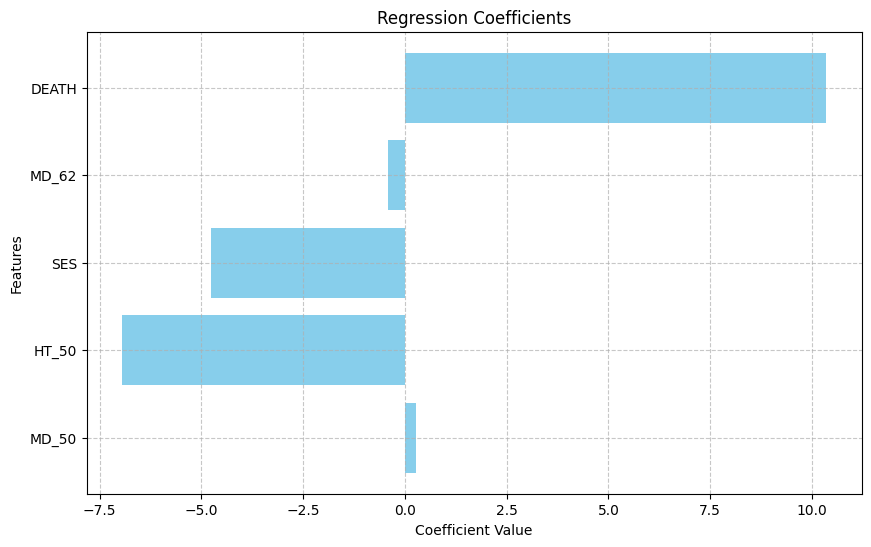

In [43]:
# Сначала выполним линейную регрессию
model, X_train, X_test, y_train, y_test = resolve_regression(X_selected_rfe, y_selected_rfe)

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X_selected_rfe.columns)


## Пару слов про метрики

In [44]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик качества
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 9.04
Mean Squared Error (MSE): 114.77
R^2 Score: -0.20


Про метрики качества в регресии - https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii#regressiya

## Регуляризация

In [45]:
X

,MD_50,SBP_50,DBP_50,HT_50,WT_50,CHOL_50,SES,CL_STATUS,MD_62,SBP_62,DBP_62,CHOL_62,WT_62,IHD_DX,DEATH
0,1,110,65,64,147,291,2,8,4,120,78,271,146,2,1
1,1,130,72,69,167,278,1,6,2,122,68,250,165,9,1
2,2,120,90,70,222,342,4,8,1,132,90,304,223,2,1
3,4,120,80,72,229,239,4,8,2,118,68,209,227,3,1
4,3,118,74,66,134,243,3,8,5,118,56,261,138,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,115,80,66,148,300,2,8,1,115,65,273,152,0,0
196,1,110,70,69,137,120,3,8,2,112,76,198,153,0,0
197,3,130,80,66,150,210,5,0,1,130,85,274,158,0,0
198,3,140,84,66,138,130,4,6,2,148,88,160,157,0,0


Про регуляризацию - https://yandex.ru/q/datascience/10672717313/

1. **L1-регуляризация (Lasso)**:
   Формула для L1-регуляризации добавляет штраф, который равен сумме абсолютных значений весов модели. Это может привести к обнулению некоторых весов, то есть к выбору только наиболее значимых признаков.

   Формула для L1-регуляризации:
   J(θ) = Функция потерь + λ * Σ|θ_i|

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Функция потерь — это функция, измеряющая ошибку модели (например, среднеквадратическая ошибка),
   - λ — коэффициент регуляризации, который контролирует степень штрафа,
   - Σ|θ_i| — сумма абсолютных значений всех весов модели (θ_i).

2. **L2-регуляризация (Ridge)**:
   Формула для L2-регуляризации добавляет штраф, который равен сумме квадратов весов модели. Это не обнуляет веса, но снижает их величину, что приводит к более простым и менее подверженным переобучению моделям.

   Формула для L2-регуляризации:
   J(θ) = Функция потерь + λ * Σθ_i^2

   где:
   - J(θ) — общая функция потерь с регуляризацией,
   - Σθ_i^2 — сумма квадратов всех весов модели (θ_i).

3. **Elastic Net**:
   Это комбинированный метод, который использует и L1-штраф, и L2-штраф. Он полезен, когда нужно балансировать преимущества обоих методов.

   Формула для Elastic Net:
   J(θ) = Функция потерь + λ_1 * Σ|θ_i| + λ_2 * Σθ_i^2

   где:
   - λ_1 и λ_2 — коэффициенты регуляризации для L1 и L2 частей соответственно.

Регуляризация помогает улучшить обобщающую способность модели и предотвращает её переобучение.

Regularization: l1
Mean Absolute Error (MAE): 7.96
Mean Squared Error (MSE): 92.16
R^2 Score: 0.04


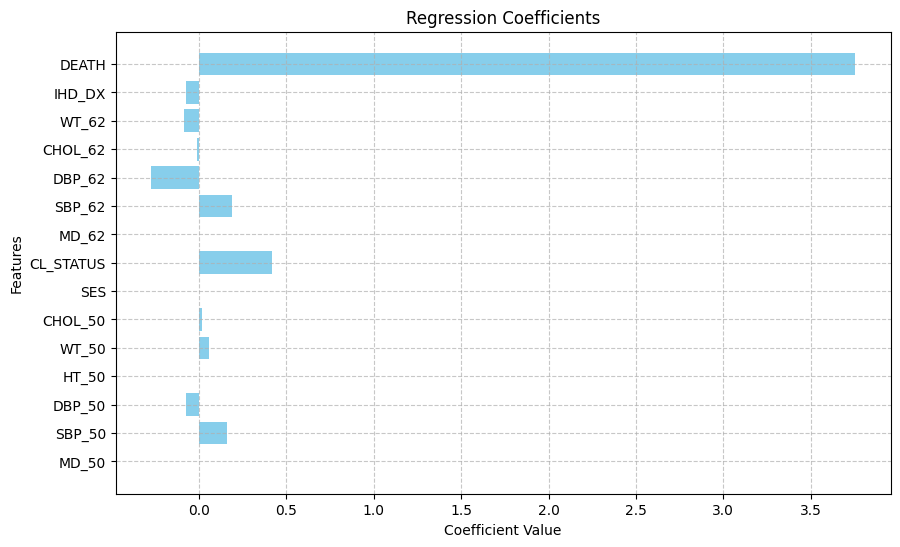

In [46]:
# L1-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l1')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Regularization: l2
Mean Absolute Error (MAE): 8.53
Mean Squared Error (MSE): 100.81
R^2 Score: -0.05


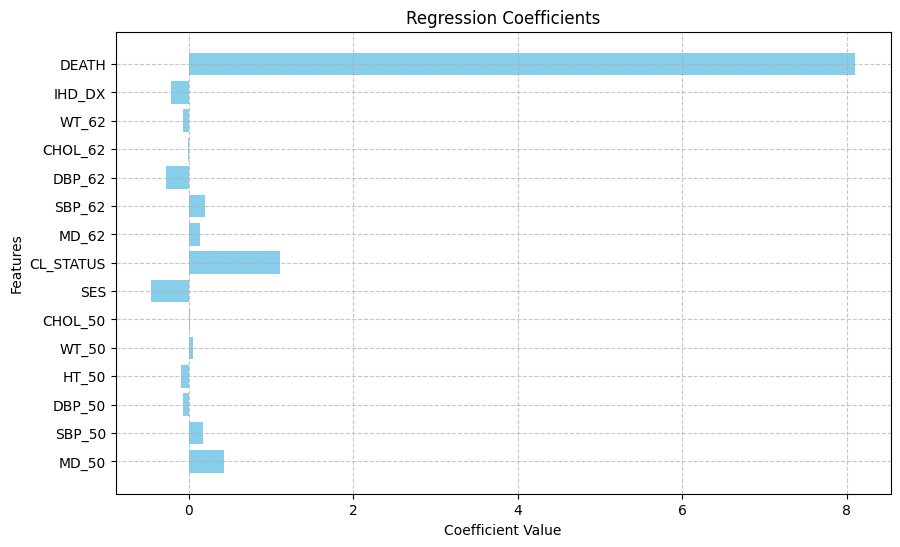

In [47]:
# L2-регуляризация
model, _, _, _, _ = resolve_regression(X, y, regularization='l2')
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)

Regularization: None
Mean Absolute Error (MAE): 8.58
Mean Squared Error (MSE): 101.78
R^2 Score: -0.06


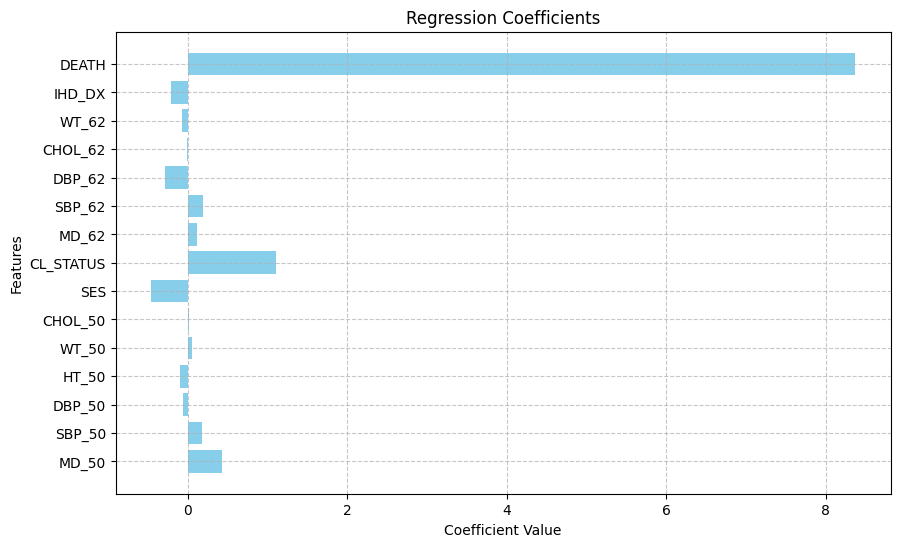

In [48]:
# Без регуляризации
model, _, _, _, _  = resolve_regression(X, y, regularization=None)
None

# Визуализация коэффициентов регрессии
plot_regression_coefficients(model, X.columns)


Инопланетные зеленые человечки

In [49]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
import pandas as pd

def select_features_decision_tree(X, y, max_features=5):
    # Инициализация модели дерева решений
    model = DecisionTreeRegressor()

    # Обучение модели
    model.fit(X, y)

    # Отбор признаков с использованием SelectFromModel
    selector = SelectFromModel(model, max_features=max_features, prefit=True)
    selected_features = X.columns[selector.get_support()]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

основано на методе дерево, аналогично, ищет числовые признаки пока не дойдет до дна(или установленного конца алгоритма)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression

def select_features_knn(X, y, max_features=5):
    # Инициализация модели K-ближайших соседей
    model = KNeighborsRegressor()

    # Используем SelectKBest для отбора признаков
    selector = SelectKBest(score_func=f_regression, k=max_features)
    selector.fit(X, y)

    # Получаем отобранные признаки
    selected_features = X.columns[selector.get_support()]

    # Возвращаем X и y с отобранными признаками
    return X[selected_features], y

тоже самое что из категориальными: ищет близжайший набор и определяет, правильно или нет

In [51]:
X_selected_dt, y_selected_dt = select_features_decision_tree(X, y, max_features=5)
print("Отобранные признаки с DecisionTreeRegressor:")
print(X_selected_dt.columns)

Отобранные признаки с DecisionTreeRegressor:
Index(['SBP_50', 'CHOL_50', 'SBP_62', 'CHOL_62', 'DEATH'], dtype='object')


In [52]:
X_selected_knn, y_selected_knn = select_features_knn(X, y, max_features=5)
print("Отобранные признаки с KNeighborsRegressor:")
print(X_selected_knn.columns)

Отобранные признаки с KNeighborsRegressor:
Index(['SBP_50', 'DBP_50', 'SBP_62', 'WT_62', 'DEATH'], dtype='object')
